# Part I: Data Preparation

## Read data from csv

In [110]:
#import os
import pandas as pd
import numpy as np

#os.chdir("/Users/YMov/cmsc643_noshow")
#DATA_DIR = 'data'
#CSV_FILE = DATA_DIR + '/KaggleV2-May-2016.csv'

# read data using read_csv function

Location=r'C:\Users\Yazdan\Desktop\noshowappointments\KaggleV2-May-2016.csv'
data=pd.read_csv(Location, parse_dates = ['ScheduledDay', 'AppointmentDay'] )

## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [111]:

# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df

clean_data=data
clean_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [112]:
clean_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [113]:
# Removing Negative values of Age
clean_data=clean_data.drop(clean_data[clean_data['Age']<0].index)

clean_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [114]:
PROCESSED_DATA_DIR = 'processed_data'

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
for train_index, test_index in split.split(clean_data, clean_data["No-show"]):
    train_set = clean_data.loc[train_index]
    test_set = clean_data.loc[test_index]

train_set["No-show"].value_counts() / len(train_set)

test_set["No-show"].value_counts() / len(test_set)  


C:\Users\yazdan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.


No     0.797973
Yes    0.202027
Name: No-show, dtype: float64

## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

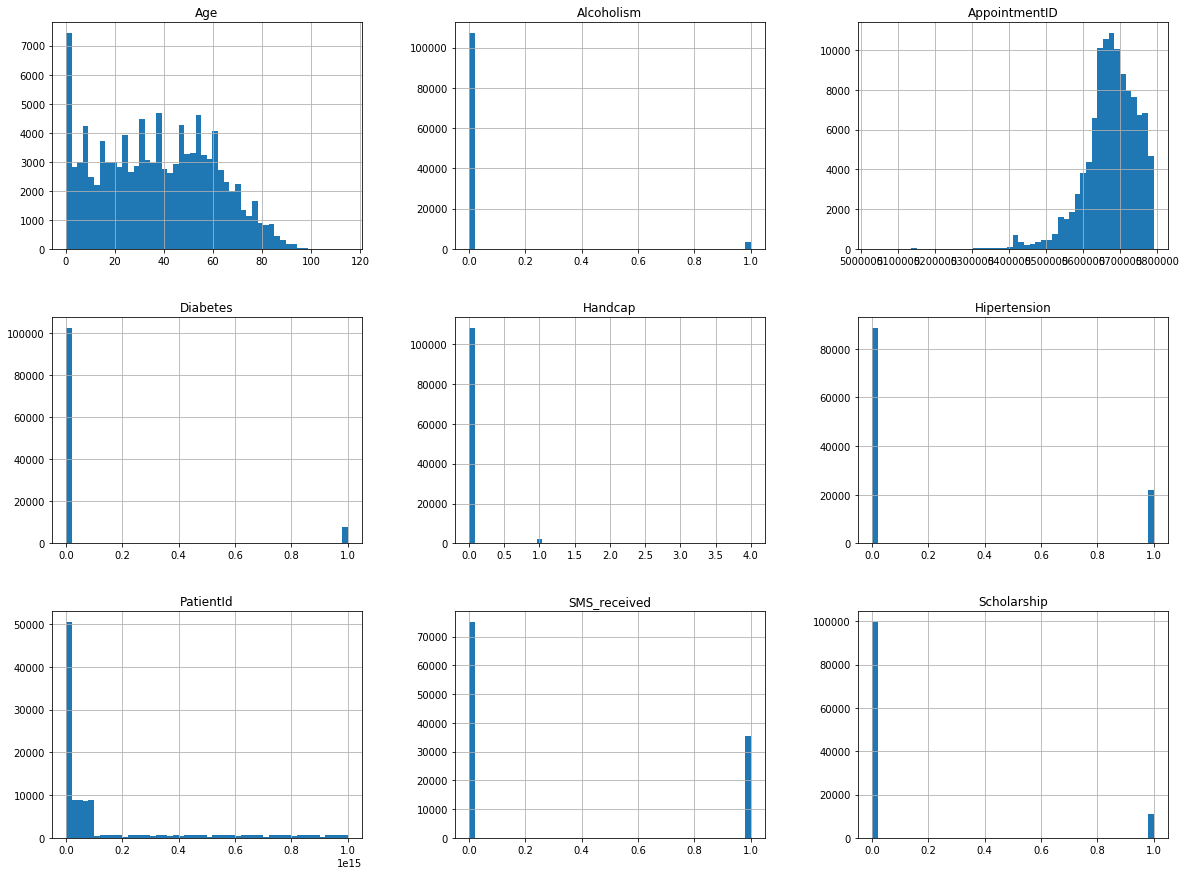

In [115]:
# Make plots here!
import matplotlib.pyplot as plt
clean_data.hist(bins=50, figsize=(20,15))
plt.show()

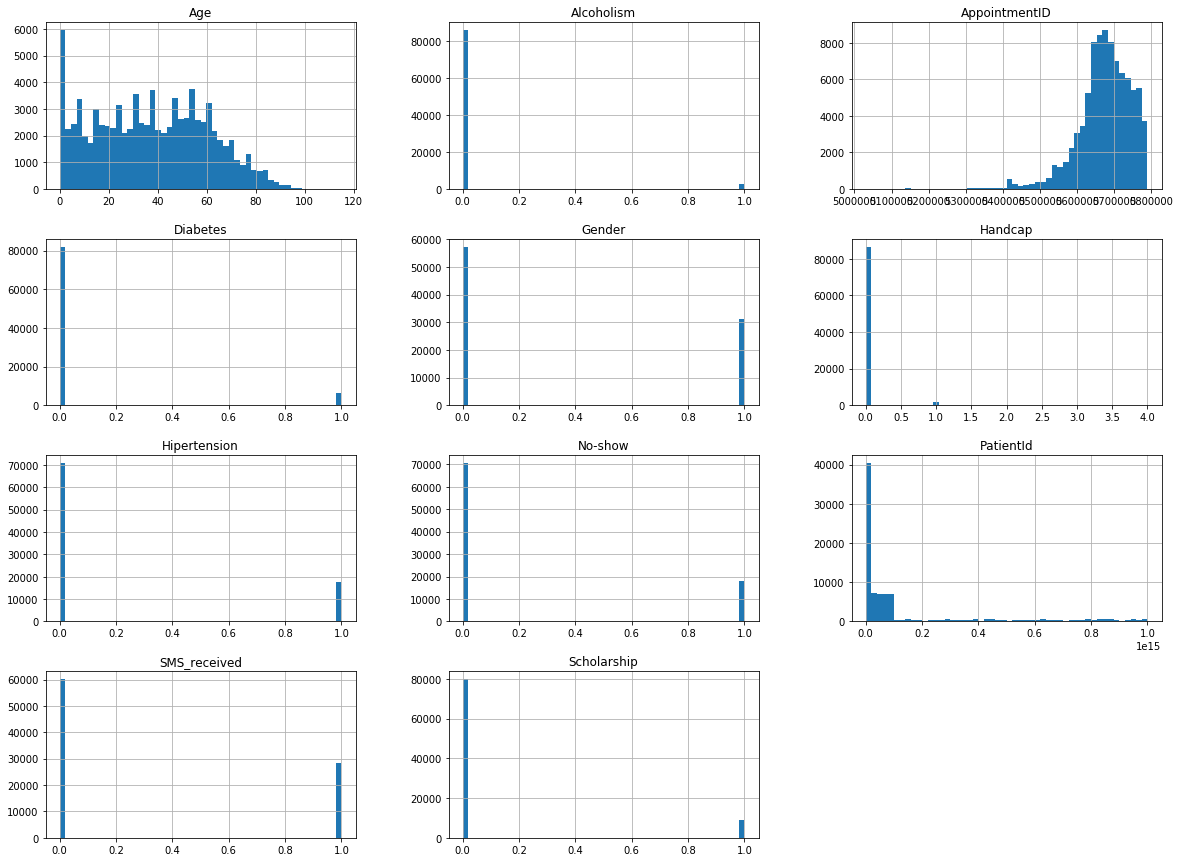

In [116]:
# transforming categorical variables

train_set.Gender  = train_set.Gender.apply(lambda x: 0 if x=='F' else 1)
train_set["No-show"]  = train_set["No-show"].apply(lambda x: 0 if x=='No' else 1)

train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [117]:
table1=pd.crosstab(train_set["No-show"],train_set.Alcoholism, margins=True)
table2=pd.crosstab(train_set["No-show"],train_set.Diabetes, margins=True)
table3=pd.crosstab(train_set["No-show"],train_set.Gender, margins=True)
table4=pd.crosstab(train_set["No-show"],train_set.Handcap, margins=True)
table5=pd.crosstab(train_set["No-show"],train_set.Hipertension, margins=True)
table6=pd.crosstab(train_set["No-show"],train_set["SMS_received"], margins=True)
table7=pd.crosstab(train_set["No-show"],train_set.Scholarship, margins=True)
print(table1)
print('\n')
print(table2)
print('\n')
print(table3)
print('\n')
print(table4)
print('\n')
print(table5)
print('\n')
print(table6)
print('\n')
print(table7)

Alcoholism    0.0   1.0    All
No-show                       
0           68408  2158  70566
1           17318   535  17853
All         85726  2693  88419


Diabetes    0.0   1.0    All
No-show                     
0         65324  5242  70566
1         16713  1140  17853
All       82037  6382  88419


Gender       0      1    All
No-show                     
0        45715  24851  70566
1        11671   6183  17854
All      57386  31034  88420


Handcap    0.0   1.0  2.0  3.0  4.0    All
No-show                                   
0        69110  1329  119    8    0  70566
1        17526   294   29    3    1  17853
All      86636  1623  148   11    1  88419


Hipertension    0.0    1.0    All
No-show                          
0             56048  14518  70566
1             14844   3009  17853
All           70892  17527  88419


SMS_received    0.0    1.0    All
No-show                          
0             50032  20534  70566
1             10054   7799  17853
All           60086  283

In [118]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88420 entries, 78966 to 10278
Data columns (total 14 columns):
PatientId         88419 non-null float64
AppointmentID     88419 non-null float64
Gender            88420 non-null int64
ScheduledDay      88419 non-null datetime64[ns]
AppointmentDay    88419 non-null datetime64[ns]
Age               88419 non-null float64
Neighbourhood     88419 non-null object
Scholarship       88419 non-null float64
Hipertension      88419 non-null float64
Diabetes          88419 non-null float64
Alcoholism        88419 non-null float64
Handcap           88419 non-null float64
SMS_received      88419 non-null float64
No-show           88420 non-null int64
dtypes: datetime64[ns](2), float64(9), int64(2), object(1)
memory usage: 10.1+ MB


## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer,Imputer, OneHotEncoder, LabelEncoder
from sklearn_pandas import DataFrameMapper

train_set=train_set['No-show','AppointmentDay', 'ScheduledDay','Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes',
 'Alcoholism','Handcap','SMS_received']

# create pipeline here!

class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values
    
# This transformer adds the normalized attributes we looked at above
gender_ix, day_week_appoitntment_ix = 3, 5

class NormalizedFeatures(BaseEstimator, TransformerMixin):        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        gender = X[:, gender_ix]
        day_week = X[:, day_week_appoitntment_ix]
        return np.c_[X, gender, day_week]
    
num_pipeline = Pipeline([
    ('selector', DFSelector(num_attributes)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', NormalizedFeatures()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DFSelector(cat_attributes)),
    ('label_binarizer', LabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])


cat_attributes = ['Neighbourhood']
num_attributes = ['No-show','Gender','Age','Scholarship','Hipertension','Diabetes',
 'Alcoholism','Handcap','SMS_received']

# show the first 5 rows of the transformed training set

ModuleNotFoundError: No module named 'sklearn_pandas'

In [93]:
full_pipeline.fit(train_set)
noshow_mat = full_pipeline.transform(train_set)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [71]:
train_set.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
78966,9.328480e+13,5594887.0,1,2016-04-18T11:28:17Z,2016-05-02T00:00:00Z,33.0,BONFIM,0.0,0.0,0.0,0.0,0.0,0.0,0
38168,3.976227e+13,5720410.0,1,2016-05-19T13:47:57Z,2016-05-24T00:00:00Z,73.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0
89447,5.643864e+13,5786584.0,1,2016-06-08T08:37:30Z,2016-06-08T00:00:00Z,69.0,NOVA PALESTINA,0.0,1.0,0.0,0.0,0.0,0.0,0
69540,1.377846e+13,5690908.0,1,2016-05-12T10:54:37Z,2016-05-12T00:00:00Z,23.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,0.0,0
107049,8.332795e+11,5787306.0,1,2016-06-08T09:43:39Z,2016-06-08T00:00:00Z,6.0,ROMÃO,0.0,0.0,0.0,0.0,0.0,0.0,0
